In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | quatre cocos.
Processing Record 1  of Set 1 | bredasdorp.
Processing Record 2  of Set 1 | adamstown.
Processing Record 3  of Set 1 | geraldton.
Processing Record 4  of Set 1 | port mathurin.
Processing Record 5  of Set 1 | hawaiian paradise park.
Processing Record 6  of Set 1 | fortaleza.
Processing Record 7  of Set 1 | albany.
Processing Record 8  of Set 1 | college.
Processing Record 9  of Set 1 | ushuaia.
Processing Record 10  of Set 1 | waitangi.
Processing Record 11  of Set 1 | mejit.
Processing Record 12  of Set 1 | margaret river.
Processing Record 13  of Set 1 | sakata.
Processing Record 14  of Set 1 | laguna.
Processing Record 15  of Set 1 | ulan-ude.
Processing Record 16  of Set 1 | bethel.
Processing Record 17  of Set 1 | indiana.
Processing Record 18  of Set 1 | port-aux-francais.
Processing Record 19  of Set 1 | vadso.
Processing Record 20  of Set 1 | lihue.
Processing Record 21  of Set 

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(weather_df)

# Show Record Count
city_data_df.count()

City                585
Country             585
Date                585
Latitude            585
Longitude           585
Cloudiness (%)      585
Humidity (%)        585
Max Temp (F)        585
Wind Speed (mph)    585
dtype: int64

In [18]:
city_data_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,quatre cocos,MU,2023-11-13 13:55:56,-20.2078,57.7625,59,74,74.354,2.26
1,bredasdorp,ZA,2023-11-13 13:55:56,-34.5322,20.0403,3,78,60.692,7.62
2,adamstown,PN,2023-11-13 13:55:56,-25.066,-130.1015,91,86,73.706,8.74
3,geraldton,AU,2023-11-13 13:55:57,-28.7667,114.6,100,83,70.484,3.6
4,port mathurin,MU,2023-11-13 13:55:57,-19.6833,63.4167,0,77,77.45,1.34


In [19]:
# Export the City_Data into a csv
# Define the directory path
output_directory = 'output_data'

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
City_ID,,,,,,,,,
0,quatre cocos,MU,2023-11-13 13:55:56,-20.2078,57.7625,59.0,74.0,74.354,2.26
1,bredasdorp,ZA,2023-11-13 13:55:56,-34.5322,20.0403,3.0,78.0,60.692,7.62
2,adamstown,PN,2023-11-13 13:55:56,-25.0660,-130.1015,91.0,86.0,73.706,8.74
3,geraldton,AU,2023-11-13 13:55:57,-28.7667,114.6000,100.0,83.0,70.484,3.60
4,port mathurin,MU,2023-11-13 13:55:57,-19.6833,63.4167,0.0,77.0,77.450,1.34


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

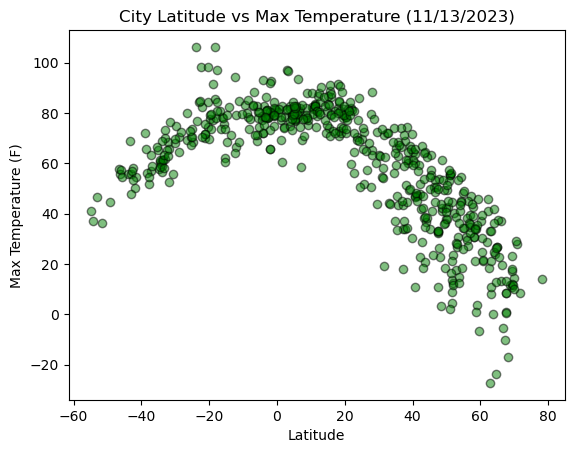

In [21]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="green", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
#Save the figure
plt.savefig("output_data/Fig1.png")

#### Latitude Vs. Humidity

Text(0.5, 1.0, 'City Latitude vs Humidity (%) (11/13/2023)')

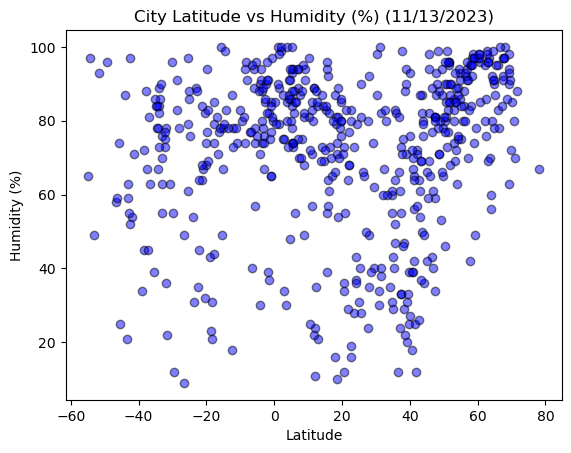

In [22]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")


#### Latitude Vs. Cloudiness

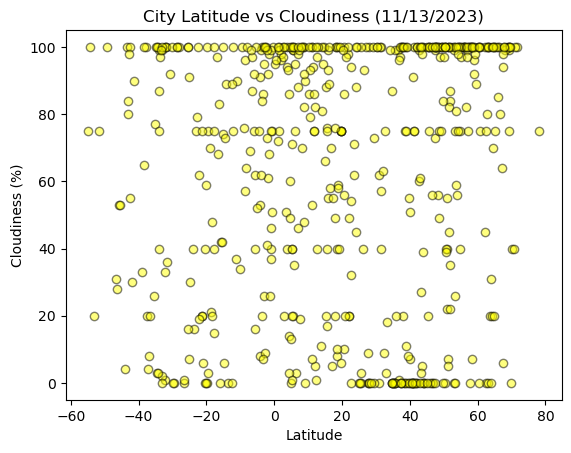

In [23]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="yellow", edgecolors="black", alpha = 0.5);
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})");

#### Latitude vs. Wind Speed Plot

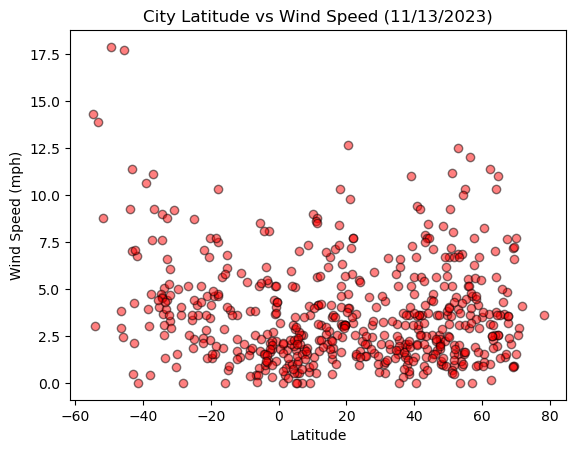

In [24]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="red", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})");

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) >=0, :]

# Display sample data
northern_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
5,hawaiian paradise park,US,2023-11-13 13:55:49,19.5933,-154.9731,75,85,79.142,3.09
7,albany,US,2023-11-13 13:51:29,42.6001,-73.9662,99,64,41.792,0.45
8,college,US,2023-11-13 13:54:46,64.8569,-147.8028,100,90,26.816,2.57
11,mejit,MH,2023-11-13 13:55:57,10.2753,170.8646,86,81,82.436,8.99
13,sakata,JP,2023-11-13 13:55:58,38.9167,139.855,100,71,49.46,11


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) <= 0, :]

# Display sample data
southern_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,quatre cocos,MU,2023-11-13 13:55:56,-20.2078,57.7625,59,74,74.354,2.26
1,bredasdorp,ZA,2023-11-13 13:55:56,-34.5322,20.0403,3,78,60.692,7.62
2,adamstown,PN,2023-11-13 13:55:56,-25.066,-130.1015,91,86,73.706,8.74
3,geraldton,AU,2023-11-13 13:55:57,-28.7667,114.6,100,83,70.484,3.6
4,port mathurin,MU,2023-11-13 13:55:57,-19.6833,63.4167,0,77,77.45,1.34


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -1.08x + 92.18
The r-squared is: -0.8608906886216391
The regression displays a negative correlation.


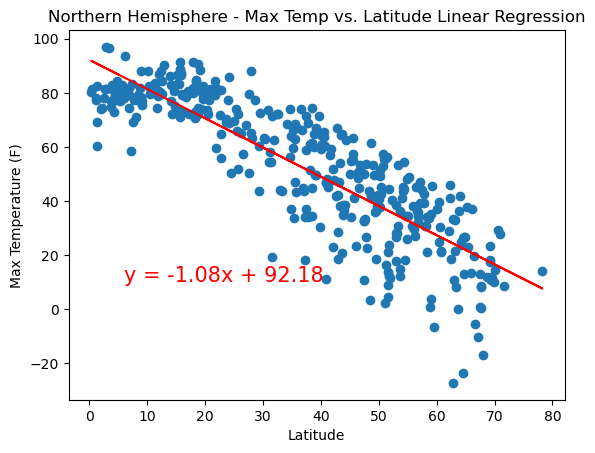

In [27]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")

plt.show()

Regression line equation is: y = 0.61x + 84.69
The r-squared is: 0.7171597663021045
The regression displays a positive correlation.


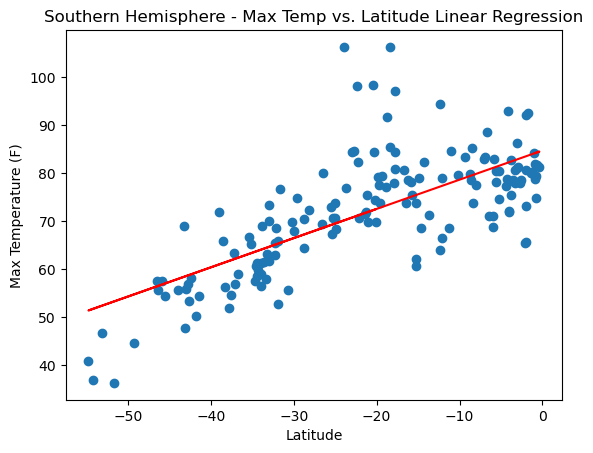

In [28]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
plt.show()

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.19x + 65.54
The r-squared is: 0.1725085899362049
The regression does not display much of a correlation between the data sets.


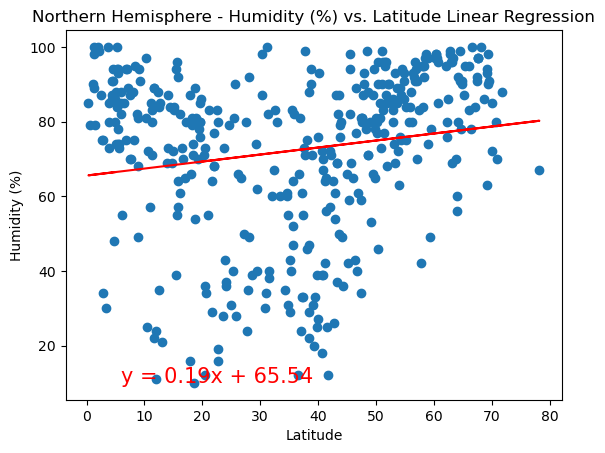

In [29]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

Regression line equation is: y = 0.3x + 77.44
The r-squared is: 0.2169675915365516
The regression does not display much of a correlation between the data sets.


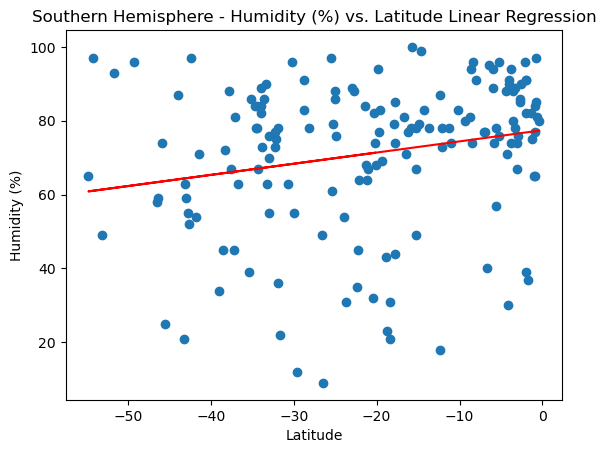

In [30]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.14x + 59.12
The r-squared is: 0.07062841874009972
The regression show a slight positive  correlation between the data sets.


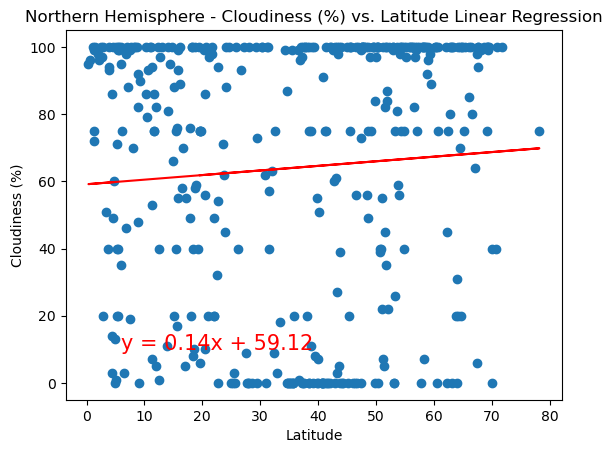

In [31]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression show a slight positive  correlation between the data sets.")
plt.show()

Regression line equation is: y = 0.16x + 63.31
The r-squared is: 0.06538069260617844
The regression  displays a slight positive correlation between the data sets.


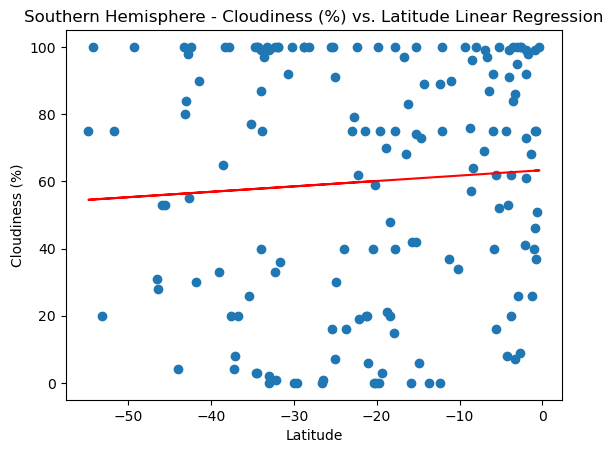

In [32]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression  displays a slight positive correlation between the data sets.")
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.02x + 2.73
The r-squared is: 0.16131034536496694
The regression does not display much of a correlation between the data sets.


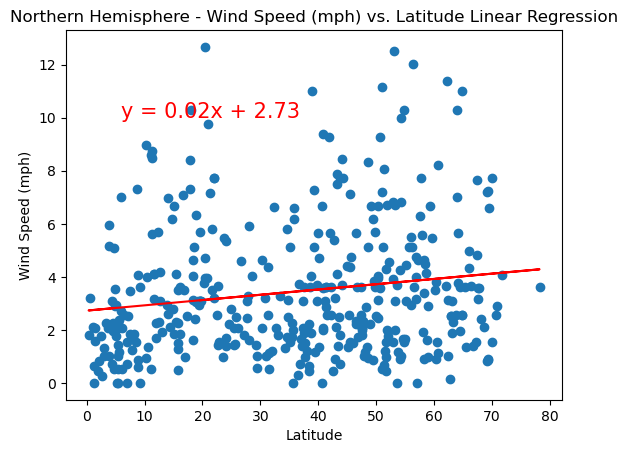

In [33]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

Regression line equation is: y = -0.09x + 2.23
The r-squared is: -0.4349793750651972
The regression does not display much of a correlation between the data sets.


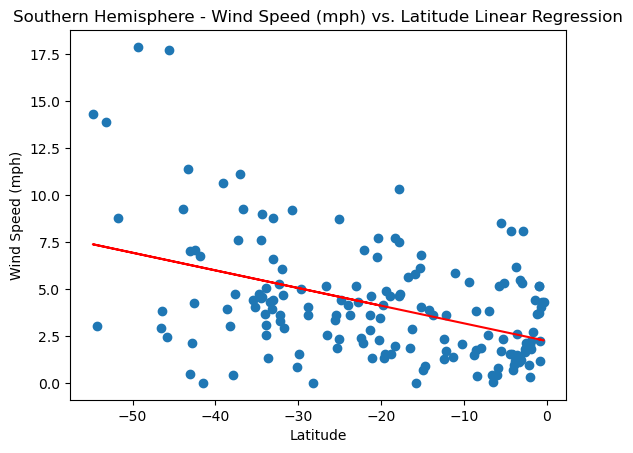

In [34]:
#Southern Hemisphere
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()